# Brainster Academy Final Project
### Team 3: Tatjana Veljkovic, Ilija Todorov, Ivana Tomovska Efremov

### Part Three

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import string
import nltk
nltk.download('punkt')
import re
from string import punctuation
from nltk.tokenize import WordPunctTokenizer, PunktSentenceTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import tqdm
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

from statistics import mean

from scipy import spatial
from ast import literal_eval

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
#!pip install pillow

In [4]:
#!pip install wordcloud

### Read data - 2011-2015

In [5]:
List_of_all_files = ['VtorDel','VtorDel_2011','VtorDel_2012','VtorDel_2013','VtorDel_2014','VtorDel_2015']

In [6]:
Working_file = List_of_all_files[5] #Chose file for working
print(Working_file)

VtorDel_2015


### Read year 2015

In [7]:
tweets_clustered = pd.read_csv(Working_file + '.csv')

In [8]:
tweets_clustered.head(2)

source  year               Tweets_cleaned  Cluster_labels  month  \
0  bbchealth  2015    breast cancer test devise               5      4   
1  bbchealth  2015  workload harm care bma poll               1      4   

   day_of_week                                            vectors  
0            3  [-0.33622923493385315, -1.757763147354126, 1.3...  
1            2  [-0.32330942153930664, -0.7956321835517883, 1....

In [9]:
tweets_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   source          9815 non-null   object
 1   year            9815 non-null   int64 
 2   Tweets_cleaned  9814 non-null   object
 3   Cluster_labels  9815 non-null   int64 
 4   month           9815 non-null   int64 
 5   day_of_week     9815 non-null   int64 
 6   vectors         9815 non-null   object
dtypes: int64(4), object(3)
memory usage: 536.9+ KB


In [10]:
tweets_clustered['year'].value_counts().sort_index()

2015    9815
Name: year, dtype: int64

### Deleting NaN rows

In [11]:
tweets_clustered.shape

(9815, 7)

In [12]:
tweets_clustered['Tweets_cleaned'].isna().sum()

1

In [13]:
tweets_clustered.loc[tweets_clustered['Tweets_cleaned'].isna()]

source  year Tweets_cleaned  Cluster_labels  month  day_of_week  \
5577  goodhealth  2015            NaN               0      2            3   

                                                vectors  
5577  [-0.017026646062731743, -0.01551264151930809, ...

In [14]:
tweets_clustered.dropna(subset=['Tweets_cleaned'], inplace=True)

In [15]:
tweets_clustered.shape

(9814, 7)

# General info

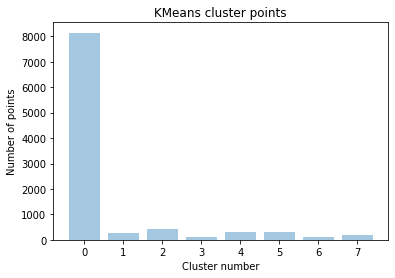

In [16]:
plt.bar([x for x in range(8)], tweets_clustered.groupby(['Cluster_labels'])['source'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [17]:
twitter_weekdays = tweets_clustered['day_of_week'].value_counts()
df_weekdays = pd.DataFrame(data=twitter_weekdays)
df_weekdays['Weekday'] = df_weekdays.index
df_weekdays.sort_values('Weekday')

day_of_week  Weekday
0         1512        0
1         1743        1
2         1735        2
3         2123        3
4         1631        4
5          596        5
6          474        6

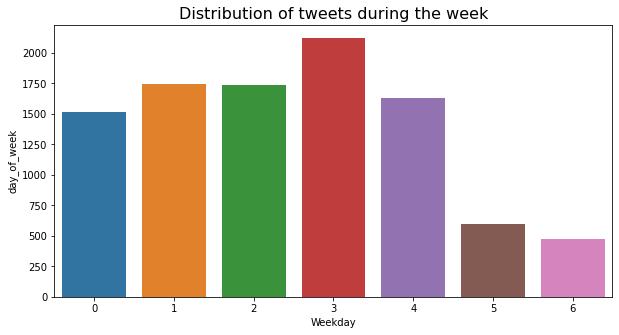

In [18]:
plt.figure(figsize = (10,5))
sns.barplot(y ='day_of_week', x = 'Weekday', data = df_weekdays)
plt.title('Distribution of tweets during the week', fontsize=16)
plt.show()

### Note: Most of the tweets are released during workdays (3 to 4 times more on workdays than during weekend days)

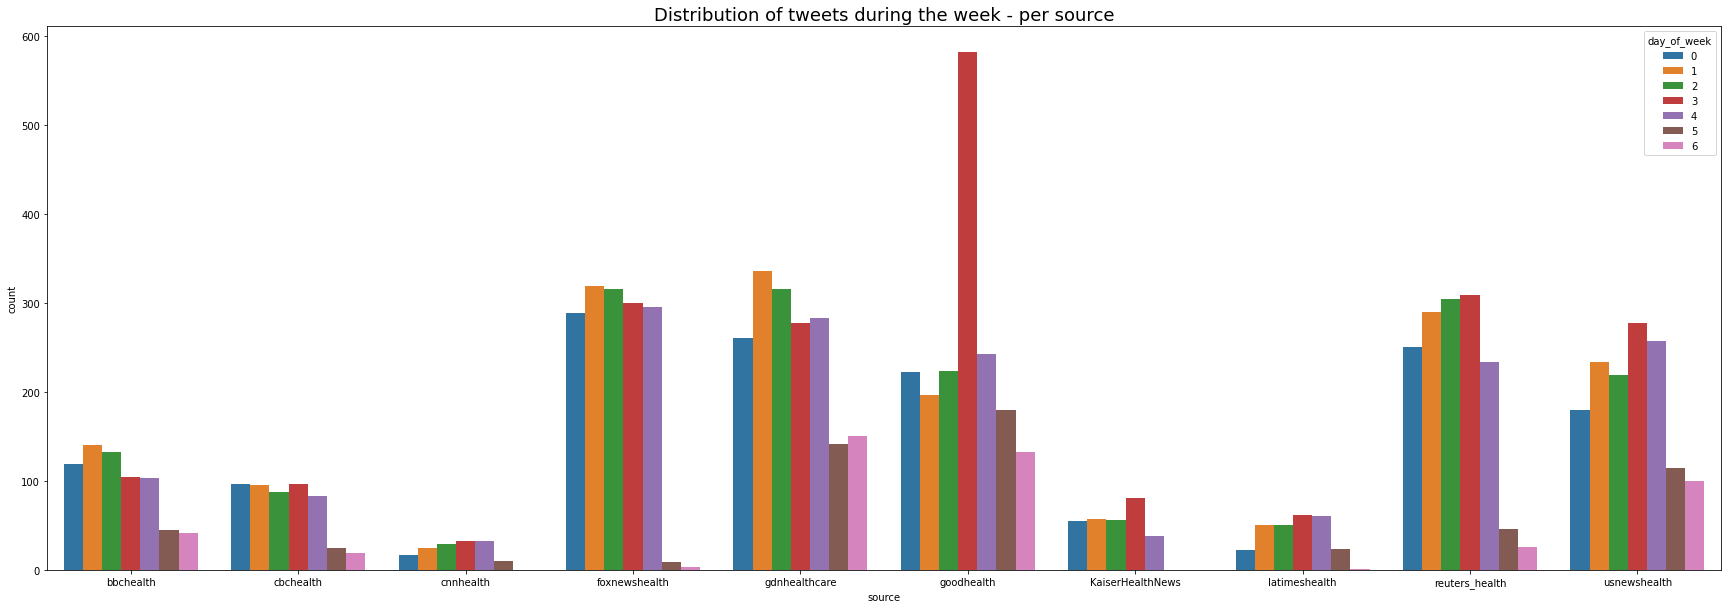

In [19]:
plt.figure(figsize = (30,10))
sns.countplot(x ='source', hue = "day_of_week", data = tweets_clustered)
plt.title('Distribution of tweets during the week - per source', fontsize=18)
plt.show()

### Note: Uneven distribution od tweets among sources, same pattern of tweets during days of the week

In [20]:
tweets_breakdown = tweets_clustered.groupby(['source', 'month']).count()
#tweets_breakdown[:50]

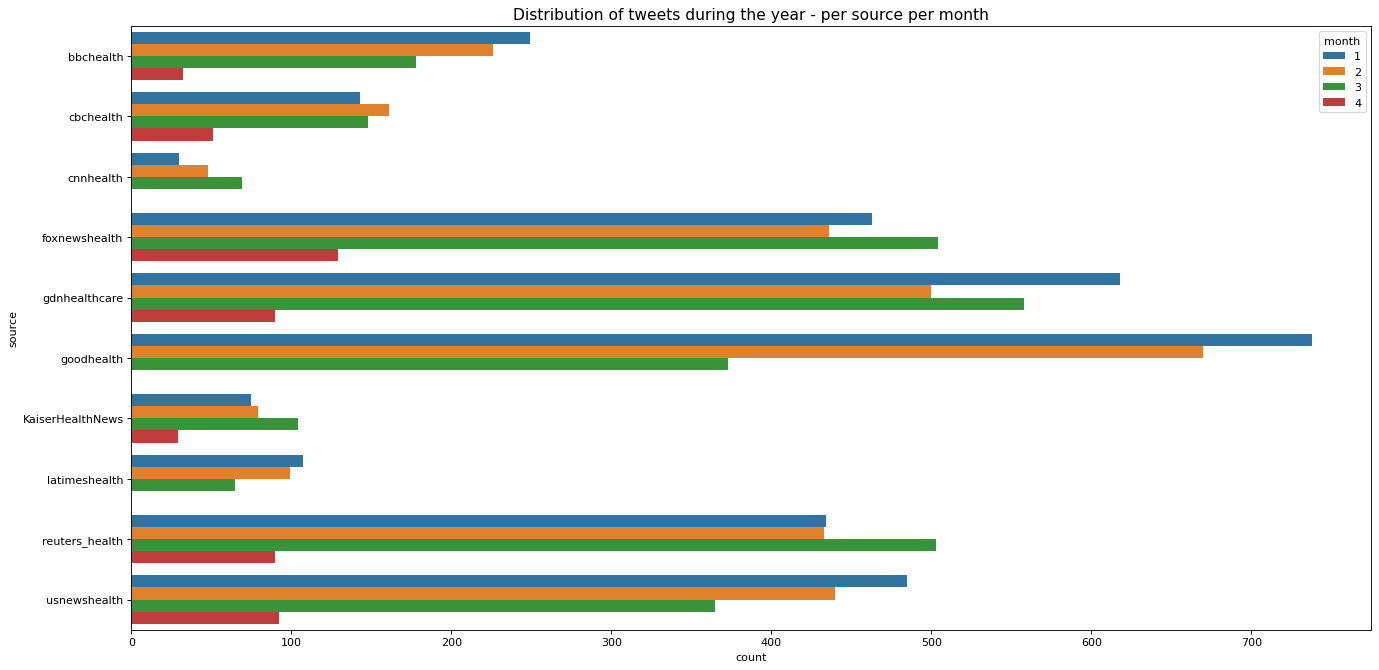

In [21]:
plt.figure(figsize=(20,10),dpi=80)
sns.countplot(data=tweets_clustered, y="source", hue="month")
plt.title('Distribution of tweets during the year - per source per month', fontsize=14)
plt.show()

# Word cloud per source

In [62]:
source = tweets_clustered['source'].unique().tolist()
#source

In [82]:
source_list_toshow = []

source_list = tweets_clustered['source'].unique().tolist()

for i in source_list:
    source_individual = tweets_clustered[tweets_clustered['source'] == i]
    text_source_individual = " ".join(cat for cat in source_individual.Tweets_cleaned)
    #mask = np.array(Image.open("twitter-2012-negative-logo-5C6C1F1521-seeklogo.com.png"))
    
    
    word_cloud_source = WordCloud(
    width=5000,
    height=3000,
    random_state=1,
    #mask=mask,
    background_color="white",
    colormap="winter",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(text_source_individual)
    
    source_list_toshow.append(word_cloud_source)

In [ ]:
#source 

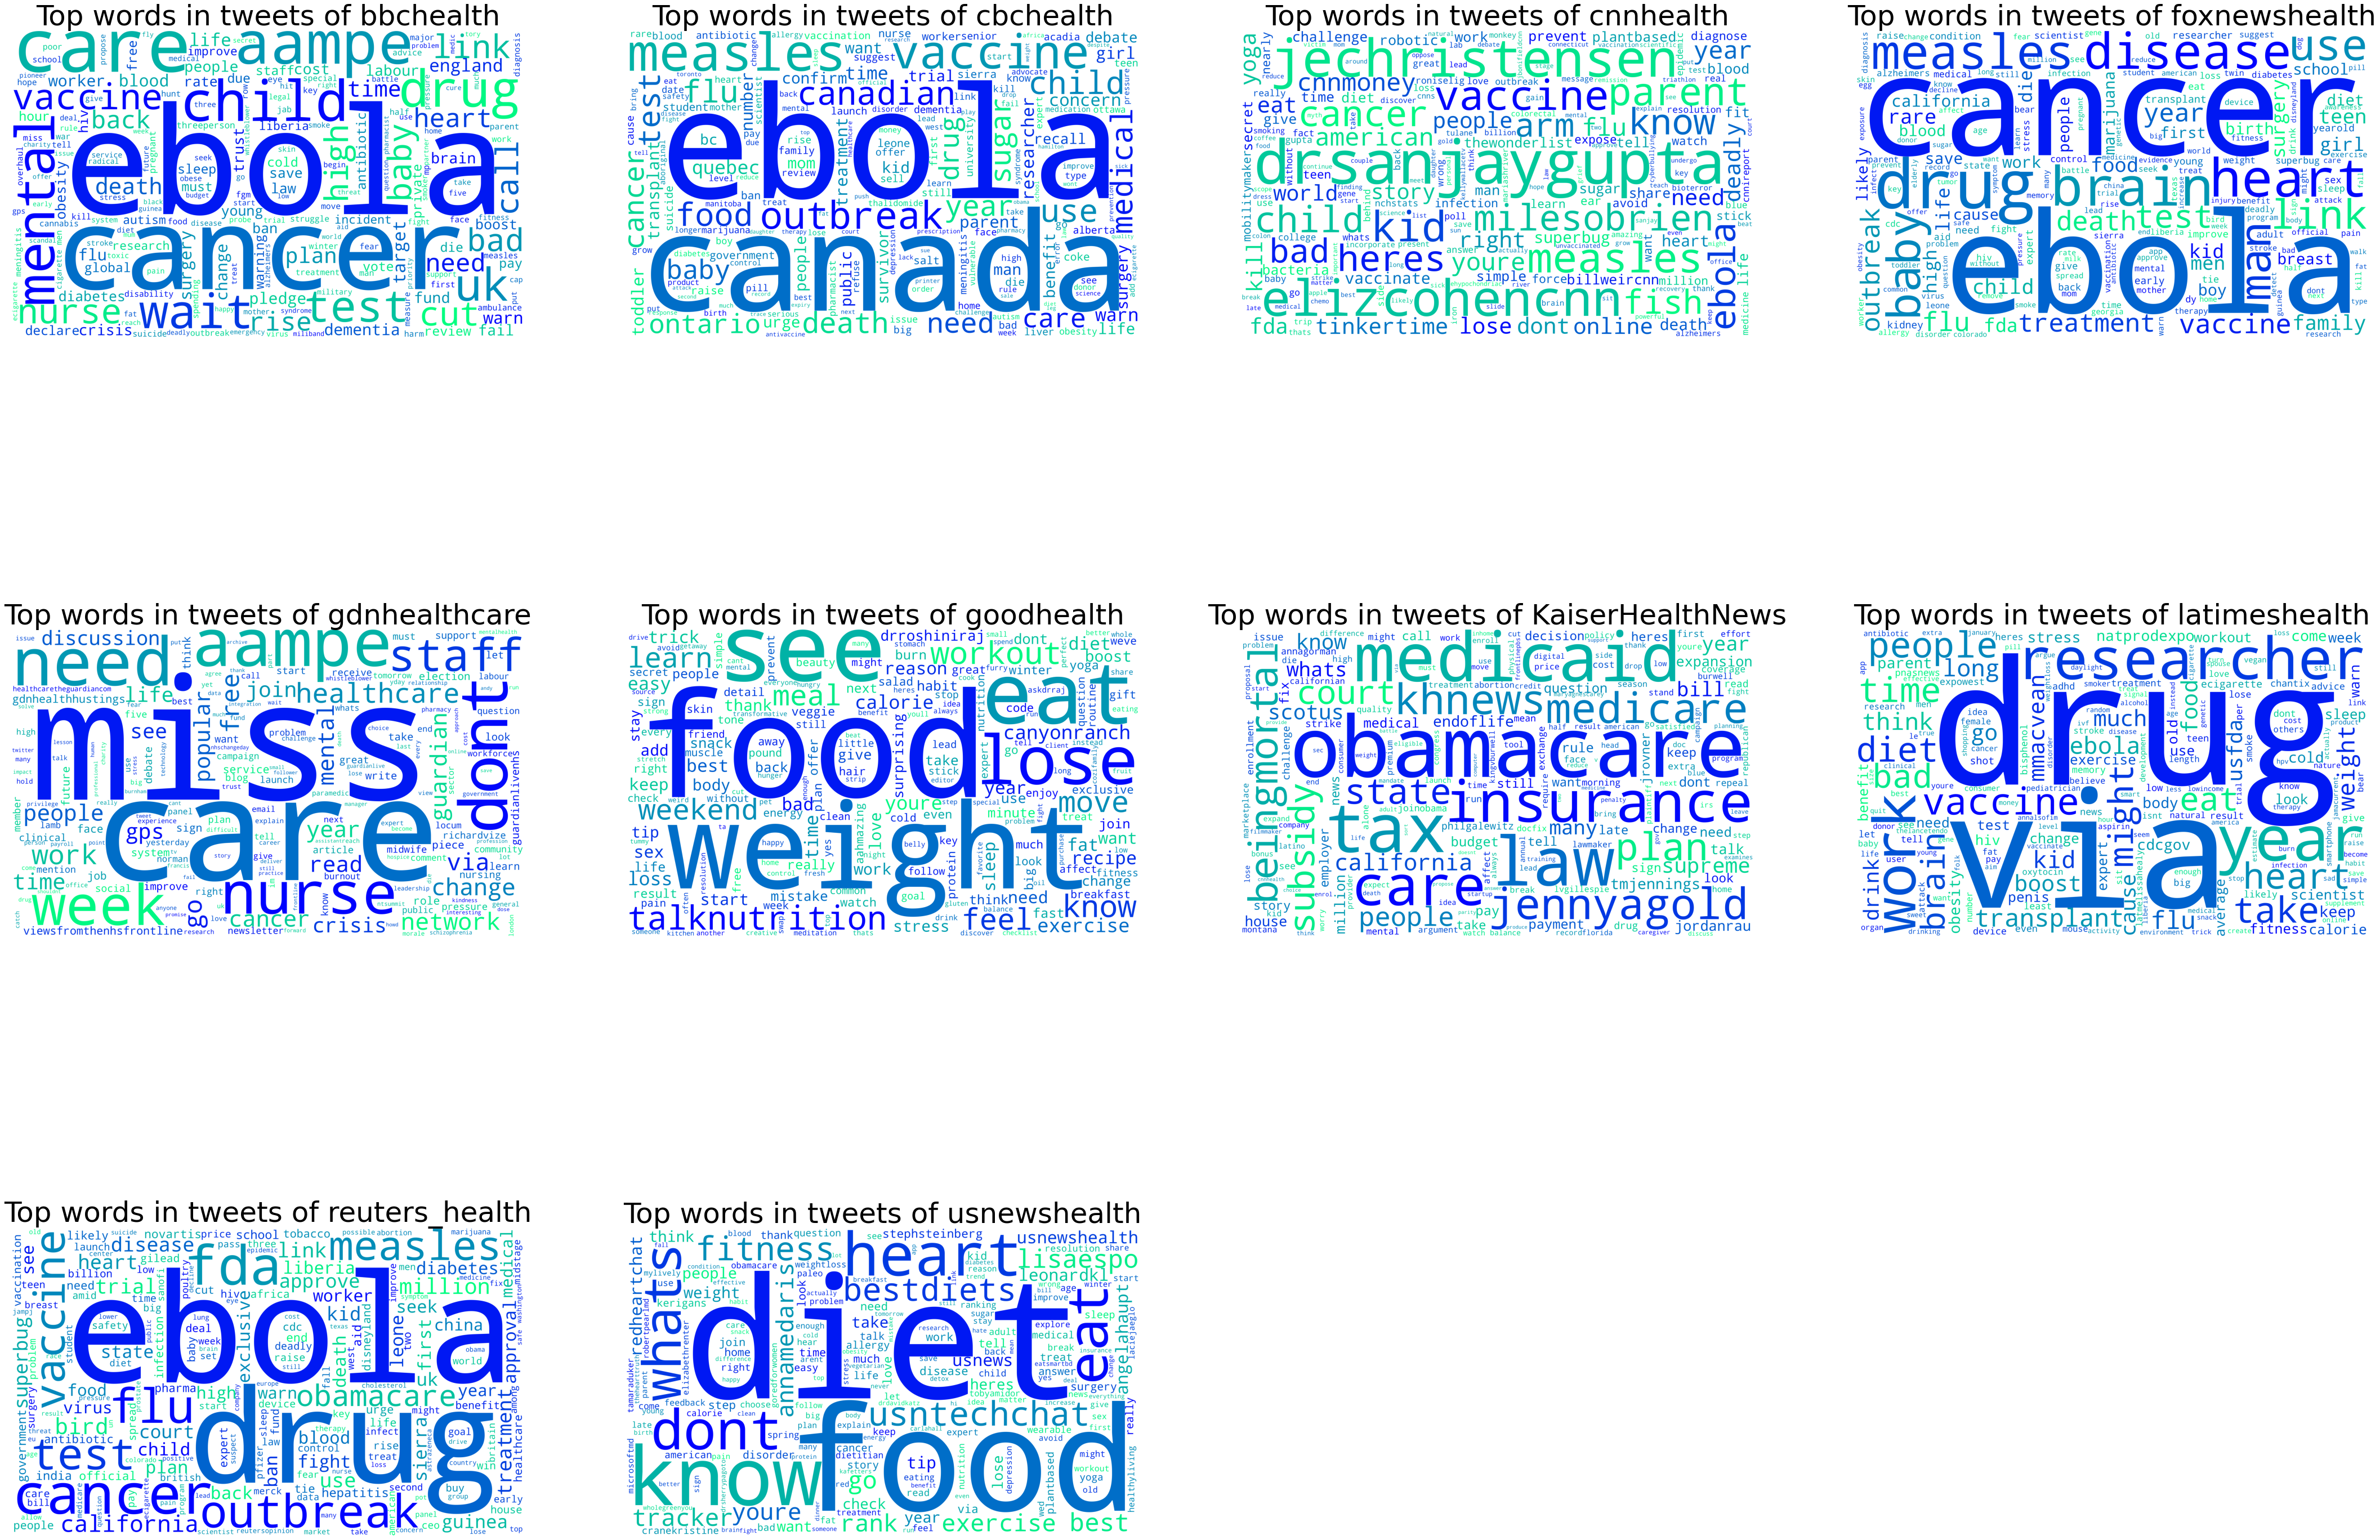

In [83]:
fig = plt.figure(figsize=(75,75))
count = 1

for i in range(len(source)):
    ax=fig.add_subplot(4,4, count)
    ax.imshow(source_list_toshow[i])
    plt.title((f'Top words in tweets of {source[i]}'), size=50)
    ax.axis("off")
    count += 1
plt.show()